In [53]:
import numpy as np
from random import random
from functools import reduce
from collections import namedtuple
from queue import PriorityQueue, SimpleQueue, LifoQueue
import matplotlib.pyplot as plt

# constants
PROBLEM_SIZE = 5   # dimension of the finite set U
NUMBER_SET = 10     # number of subsets in the collection S

State = namedtuple('State', ['taken','not_taken'])

def goal_check(state,sets):
    """
    check if the logical OR all the elements yeald a line of all true ie the
    condition for a state to be covering the whole set U
    """
    return np.all(reduce(np.logical_or, [sets[i] for i in state.taken], np.zeros(PROBLEM_SIZE)))


Greedy algorithm with pq.

The **heuristic** function calculates the number of remaining uncovered elements for each subset that has not yet been taken, and returns the index of the subset with the most uncovered elements.

In each iteration of the loop  generates a list of not taken actions and prioritizes them using the **heuristic** function. 

Then iterates over the list of not taken actions and generates a new state for each action. The new state is added to the priority queue, and the `remaining_elements` array is updated based on the newly selected subset. 

The `current_state` variable is then set to the state with the highest priority in the queue.

If a solution is found within the iteration limit, the number of steps taken by the algorithm is appended to the `gpq_steps` list.

In [54]:
def greedy_priority_queue_solve(gpq_steps, sets):
    # heuristic function for prioritizing subsets
    def heuristic(state, sets, remaining_elements):
        uncovered_counts = np.sum([sets[i] & remaining_elements for i in state.not_taken])
        return np.argmax(uncovered_counts)
    

    frontier = PriorityQueue()
    frontier= LifoQueue()
    frontier.put(State(set(), set(range(NUMBER_SET))))

    current_state = frontier.get()

    # Initialize the set of remaining elements
    remaining_elements = np.ones(PROBLEM_SIZE, dtype=bool)

    # Check if the current state is a solution
    counter = 0
    while not goal_check(current_state, sets):

        counter += 1
        if counter > 1024:
            break

        # Create a list of not taken actions and prioritize them using the heuristic
        not_taken_list = list(current_state.not_taken)
        not_taken_list.sort(
            key=lambda action: heuristic(
                State(current_state.taken ^ {action}, current_state.not_taken ^ {action}), sets, remaining_elements),
                  reverse=True
                  )

        for action in not_taken_list:
            newstate = State(current_state.taken ^ {action}, current_state.not_taken ^ {action})
            frontier.put(newstate)
            # Update the remaining elements based on the newly selected subset
            remaining_elements &= sets[action]

        current_state = frontier.get()

    if counter <= 1024:
        gpq_steps.append(counter)

    print(current_state,"\n")



In [55]:
pq_steps = []

N_ITERS = 100

for i in range(N_ITERS):

    sets = tuple(
    np.array([random() < .3 for i in range(PROBLEM_SIZE)]) for j in range(NUMBER_SET)
    ) # generate sets in S


    print(sets)
    greedy_priority_queue_solve(pq_steps,sets)

(array([False, False, False, False, False]), array([False,  True, False,  True,  True]), array([ True, False, False, False, False]), array([ True, False, False, False, False]), array([False, False, False, False, False]), array([False,  True,  True, False, False]), array([False, False,  True, False, False]), array([False, False, False, False, False]), array([False, False, False, False,  True]), array([ True,  True, False,  True, False]))
State(taken={8, 9, 6, 7}, not_taken={0, 1, 2, 3, 4, 5}) 

(array([False,  True, False, False, False]), array([False, False, False,  True, False]), array([ True, False, False,  True, False]), array([ True, False,  True, False, False]), array([False, False, False, False, False]), array([False, False, False, False,  True]), array([ True, False, False, False, False]), array([False, False, False, False, False]), array([False,  True, False,  True, False]), array([ True,  True,  True, False, False]))
State(taken={5, 6, 7, 8, 9}, not_taken={0, 1, 2, 3, 4}) 

(a

In [56]:
pq_mean = np.mean(pq_steps)

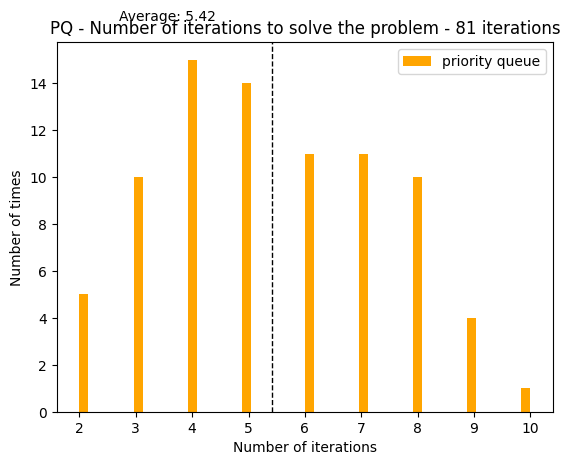

In [57]:
plt.hist(pq_steps, bins=50, label="priority queue",color='orange')
# add a vertical line at the average and the value
plt.axvline(pq_mean, color='k', linestyle='dashed', linewidth=1)
plt.text(pq_mean/2, N_ITERS/6, 'Average: {:.2f}'.format(pq_mean))

plt.legend(loc='upper right')
plt.title(f"PQ - Number of iterations to solve the problem - {len(pq_steps)} iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Number of times")
plt.show()